In [60]:
data_path = '/home/yigit/projects/is/data/'
folder_path = f'{data_path}data_raw/'

time_steps = 400

In [68]:
import numpy as np
import matplotlib.pyplot as plt


def process_file(file_path):
    if '7_2_states.npy' in file_path:
        temp = np.load(file_path)
        np.save(file_path, temp[1:])
    states = np.load(file_path)
    ego_states = np.zeros_like(states)
    
    # final pose of the traj is the goal
    start_pose, goal_pose = states[0, :2], states[-1, :2]
    for i, state in enumerate(states):
        ego_states[i, :2] = goal_pose - state[:2]
        ego_states[i, 2:] = state[2:]
#     ego_states[i, -2:] = [0, 0]  # last vel is 0
    return start_pose, goal_pose, ego_states


def interpolate(states):
    t_orig, d = states.shape
    
    t = np.linspace(0, 1, time_steps)
    tp = np.linspace(0, 1, t_orig)
    
    cont_states = np.zeros((time_steps, d))
    
    for i in range(d):
        cont_states[:, i] = np.interp(t, tp, states[:, i])
        
    return cont_states


def plot_trajectories(trajectories):
    num_trajs = trajectories.shape[0]
    for i in range(num_trajs):
        plt.plot(trajectories[i, :, 0], trajectories[i, :, 1])
    
    print(f'Number of Trajectories: {num_trajs}')
    plt.show()

9


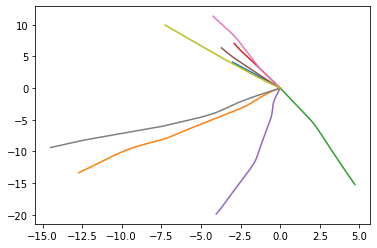

In [69]:
import os


trajectories = []
for filename in os.listdir(folder_path):
    f = os.path.join(folder_path, filename)
    
    # checking if it is a file
    if os.path.isfile(f) and f.endswith('npy'):
        start, goal, ego_states = process_file(f)
        cont_states = interpolate(ego_states)
#         print(filename)
#         print(ego_states)
        np.save(f"{data_path}/processed_states/{filename.strip('_states.npy')}.npy", cont_states)
        trajectories.append(cont_states)

trajectories = np.array(trajectories)
plot_trajectories(trajectories)